In [35]:
import cv2
import imutils
import pytesseract

In [36]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [37]:
image = cv2.imread(r"C:\Users\mishr\Downloads\maxresdefault.jpg")
resized_image = imutils.resize(image)
cv2.imshow('Original Image',image)
cv2.waitKey(0)

-1

In [38]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Grey Image",gray_image)
cv2.waitKey(0)

-1

In [39]:
gray_image = cv2.bilateralFilter(image,11,17,17)
cv2.imshow("Smoothen Image",gray_image)
cv2.waitKey(0)

-1

In [40]:
edged = cv2.Canny(gray_image,30,200)
cv2.imshow("Edged Image",edged)
cv2.waitKey(0)

-1

In [41]:
cnts,new = cv2.findContours(edged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
image1 = image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2.imshow("Contours",image1)
cv2.waitKey(0)

-1

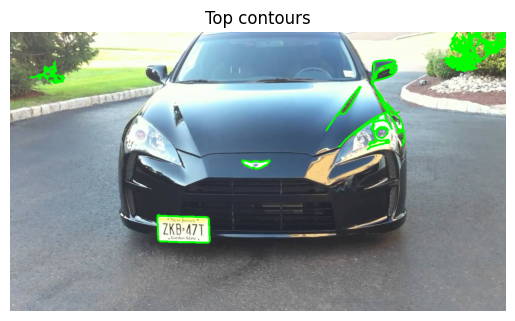

In [42]:
import matplotlib.pyplot as plt

cnts = sorted(cnts, key=cv2.contourArea,reverse=True)[:10]
screencnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the image with contours using matplotlib
plt.imshow(image_rgb)
plt.title('Top contours')
plt.axis('off')  # Hide axis
plt.show()

In [43]:
i = 7
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    epsilon = 0.018 * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4:
        screenCnt = approx
        x, y, w, h = cv2.boundingRect(c)
        new_img = image[y:y+h, x:x+w]
        cv2.imwrite(f'./{i}.png', new_img)
        i += 1
        break


In [44]:
cv2.drawContours(image,[screenCnt],-1,(0,255,0),3)
cv2.imshow("Image with number plate detected",image)
cv2.waitKey(0)
cv2.destroyAllWindows()